## Exploratory Data Analysis of Chess Data

This notebook contains an exploratory data analysis of Chess Data. The data was found on kaggle (https://www.kaggle.com/datasets/datasnaek/chess) and contains data of games played in the platform Lichess. By modifying and vizualizing the data I performed an univariate and a bivariate analysis. The goal of this notebook is to gain insights into the statistics of online chess and to extract findings that cn improve ones chess.


In [2]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Setting the style for table headings
styles = [dict(selector="caption", props=[('font-size', '120%'), ('font-weight', 'bold'), ('font-family', 'Arial')])]

# Setting the syles for graph titles and labels
font_dict_title = {
    'family': 'Arial',
    'weight': 'bold',
    'size': 15
}

font_dict_labels = {
    'family': 'Arial',
    'size': 10
}

#### 1. Import, first look at the data and preperation of the data

In [5]:
df = pd.read_csv('games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
print(df.shape)

(20058, 16)


In [7]:
print(df.describe())

         created_at  last_move_at         turns  white_rating  black_rating  \
count  2.005800e+04  2.005800e+04  20058.000000  20058.000000  20058.000000   
mean   1.483617e+12  1.483618e+12     60.465999   1596.631868   1588.831987   
std    2.850151e+10  2.850140e+10     33.570585    291.253376    291.036126   
min    1.376772e+12  1.376772e+12      1.000000    784.000000    789.000000   
25%    1.477548e+12  1.477548e+12     37.000000   1398.000000   1391.000000   
50%    1.496010e+12  1.496010e+12     55.000000   1567.000000   1562.000000   
75%    1.503170e+12  1.503170e+12     79.000000   1793.000000   1784.000000   
max    1.504493e+12  1.504494e+12    349.000000   2700.000000   2723.000000   

        opening_ply  
count  20058.000000  
mean       4.816981  
std        2.797152  
min        1.000000  
25%        3.000000  
50%        4.000000  
75%        6.000000  
max       28.000000  


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB
None


In [9]:
# Checking for nan values in the columns
for col in df.columns:
    print(f'There are nan values in column {col}: {df[col].isna().any()}')

There are nan values in column id: False
There are nan values in column rated: False
There are nan values in column created_at: False
There are nan values in column last_move_at: False
There are nan values in column turns: False
There are nan values in column victory_status: False
There are nan values in column winner: False
There are nan values in column increment_code: False
There are nan values in column white_id: False
There are nan values in column white_rating: False
There are nan values in column black_id: False
There are nan values in column black_rating: False
There are nan values in column moves: False
There are nan values in column opening_eco: False
There are nan values in column opening_name: False
There are nan values in column opening_ply: False


In [10]:
# Identifying duplicated values
print(f'There are {df.duplicated().sum()} duplicates')
print(df.id.value_counts()[df.id.value_counts() > 1])

There are 429 duplicates
id
XRuQPSzH    5
edYOVb5F    4
o4T7dj5h    4
I8odmGjb    4
ZPHBiKBY    4
           ..
nKlIr6Zd    2
Wk7jfbfU    2
t4d1mz2n    2
SFhda91Z    2
V5qVe62M    2
Name: count, Length: 813, dtype: int64


There are 429 duplicates and 813 game id's that occur more than once in the dataset. That means if two players play a revenge, two games can have the same game id. Since the dataset is large with more than 20000 row, I will remove the 429 duplicates. That means there will still be some duplicated game id's but with different games assosiated with them. Therefore, I will keep those entries.

In [11]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(f'There are {df.duplicated().sum()} duplicates')

There are 0 duplicates


Next, I will extract the columns I will need for my analysis.

In [13]:
# Not needed columns 
df_final = df.drop(['id', 'created_at', 'last_move_at', 'moves'], axis=1)

# Displaying the head of the table
df_final.head().style.set_properties(**{'background-color': '#2B3467', 'color': 'white', 'border': '1.5px solid black', 'font-family': 'Arial'}).set_caption('Head of Table').set_table_styles(styles)

,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


Thankfully the data was well maintained and the cleaning was not too difficult. Now the dataset is ready for the analysis.

#### 2. Univariate Analysis

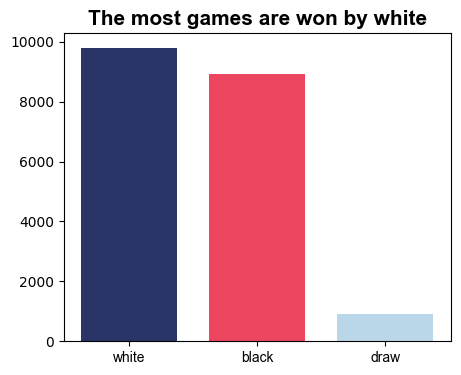

In [14]:
# Winning Rate of the two colors

distribution_wins = df_final.winner.value_counts()

fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(x=distribution_wins.index, height=distribution_wins, width=0.75, color=['#2B3467', '#EB455F', '#BAD7E9'])
plt.xticks([0, 1, 2], distribution_wins.index.to_list(), font=font_dict_labels)
plt.title('The most games are won by white', font=font_dict_title)

plt.show()

The most game are won by white, which makes sence, since the player with the white pieces is allowed to start the game. Only a small amount of games end in a draw.

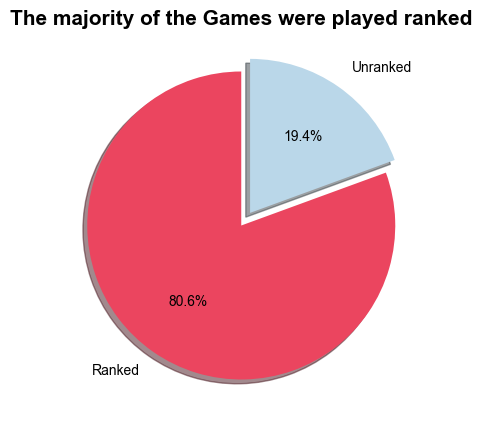

In [15]:
# Distribution of rated and unrated games

distribution_rated = df_final.rated.value_counts()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(distribution_rated.to_list(), 
       shadow=True, 
       colors=['#EB455F', '#BAD7E9'], 
       explode=[0, 0.1],
       labels=['Ranked', 'Unranked'],
       autopct='%1.1f%%',
       startangle=90,
       labeldistance=1.15,
       textprops=font_dict_labels,
      )
plt.title('The majority of the Games were played ranked', font=font_dict_title)

plt.show()

With a share of 80.5% ranked games are the most popular on the platform.

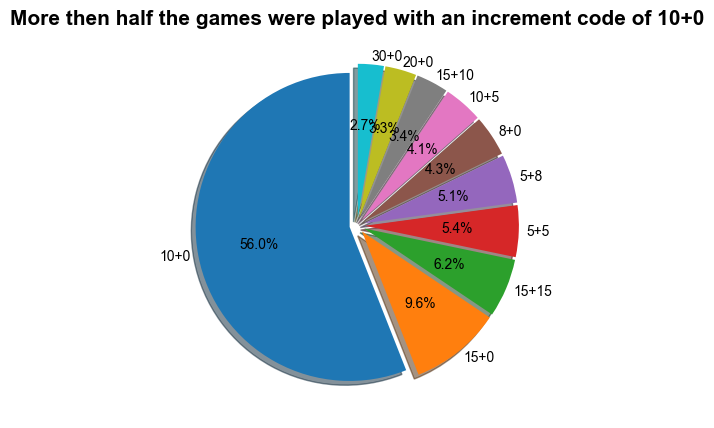

In [16]:
# Distribution of increment code used in the games

distribution_inc_code = df_final.increment_code.value_counts()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(distribution_inc_code.to_list()[:10], 
       shadow=True,
       explode=np.full(10, 0.05),
       labels=distribution_inc_code.index[:10],
       autopct='%1.1f%%',
       startangle=90,
       labeldistance=1.05,
       textprops=font_dict_labels,
      )
plt.title('More then half the games were played with an increment code of 10+0', font=font_dict_title)

plt.show()

The increment code of 10+0 is by far the most popular. Long games with a long time available to move seem to be less popular. In online chess people don't like to have long and intense games. But it must be consedered that other short and popular increment codes like 3+2 were not considered in this dataset.

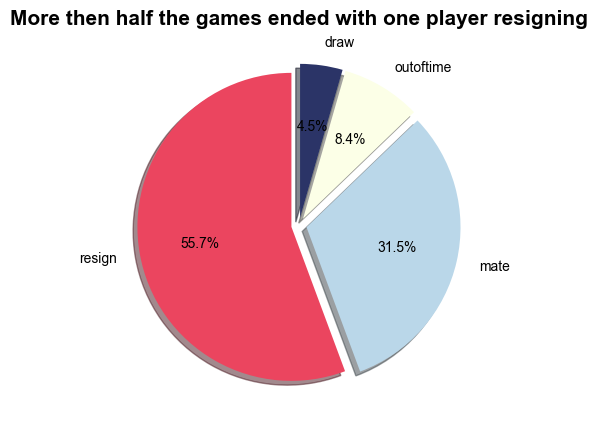

In [17]:
# Distribution of the victory status

distribution_vic_status = df_final.victory_status.value_counts()

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(distribution_vic_status.to_list(), 
       shadow=True, 
       labels=distribution_vic_status.index,
       colors=['#EB455F', '#BAD7E9', '#FCFFE7', '#2B3467'],
       explode=np.full(len(distribution_vic_status), 0.05),
       autopct='%1.1f%%',
       startangle=90,
       labeldistance=1.15,
       textprops=font_dict_labels,
      )
plt.title('More then half the games ended with one player resigning', font=font_dict_title)

plt.show()

Players are mostly resigning if they notice they are in a losing position. Only a small amount of games end because of the time ran out or in a draw.

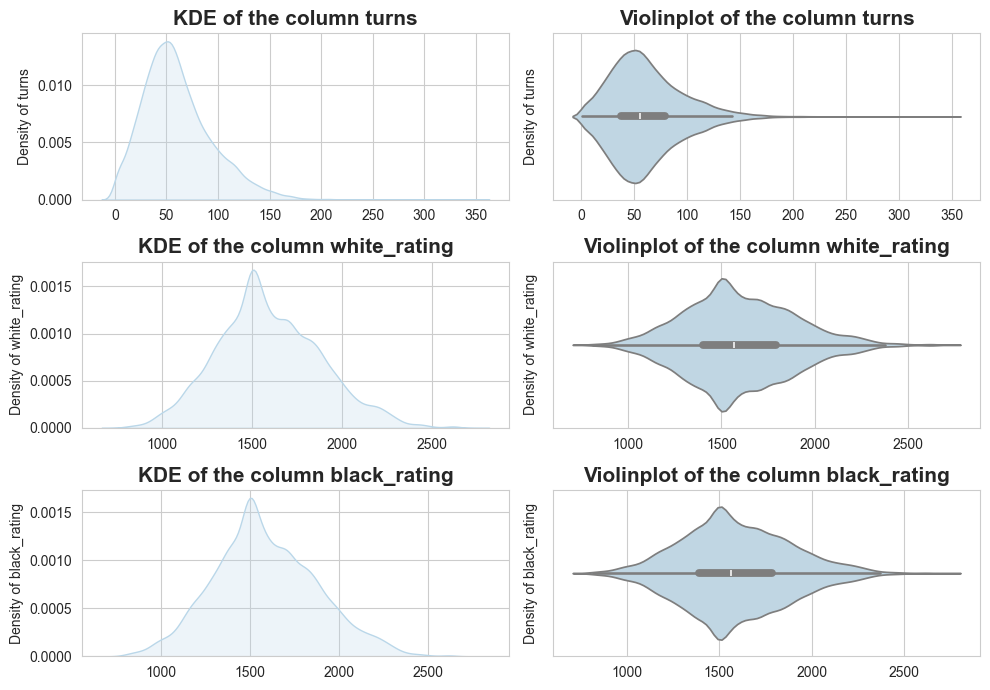

In [18]:
# Distribution of number of turns and rating of black and white

sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 2, figsize=(10, 7))

# Columns that I want to look at in the next plot
columns = ['turns', 'white_rating', 'black_rating']

n = 0
for col in columns:  
    sns.kdeplot(data=df_final, x=df_final[col], ax=axs[n, 0], color='#BAD7E9', fill=True)
    axs[n, 0].set_title(f'KDE of the column {col}', font=font_dict_title)
    axs[n, 0].set_xlabel('')
    axs[n, 0].set_ylabel(f'Density of {col}', font=font_dict_labels)
    sns.violinplot(data=df_final, x=df_final[col], ax=axs[n, 1], color='#BAD7E9')
    axs[n, 1].set_title(f'Violinplot of the column {col}', font=font_dict_title)
    axs[n, 1].set_xlabel('')
    axs[n, 1].set_ylabel(f'Density of {col}', font=font_dict_labels)
    n+=1
    
plt.tight_layout()
plt.show()

The distribution of turns per game is slighlty skewed to the right side. On average the games end after around 50 played moves. ther average rating of the players in the online games is around 1500. But there are also few players with a rating well below 1000 and on the other side there are very few players with a rating above 2500.

#### 3. Analyzing the most popular openings

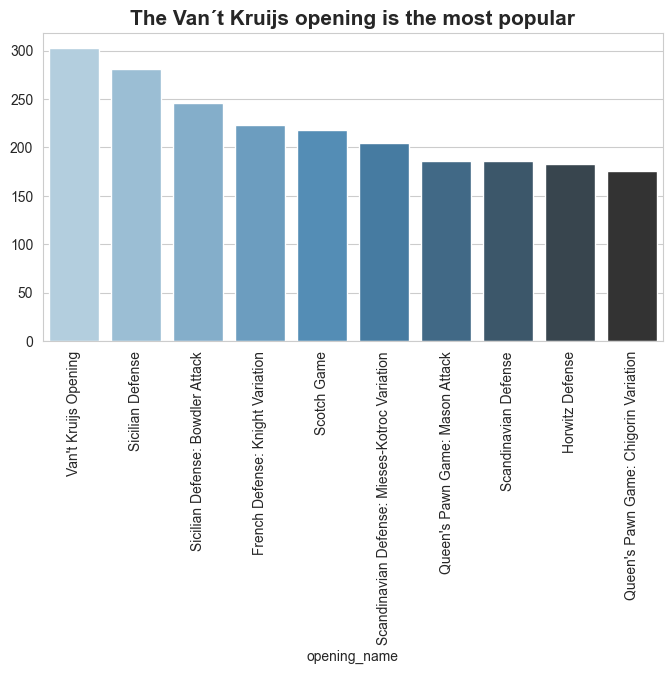

In [29]:
# Openings used in the chess games

df_opening = df_final[df_final.rated == True] # making sure we are only considering ranked games

unique_opening_eco = df_opening.opening_name.value_counts()[:10]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(x=unique_opening_eco.index, y=unique_opening_eco.values, palette='Blues_d', hue=np.arange(1,11)/10, legend=False)
ax.set_title('The Van´t Kruijs opening is the most popular', font=font_dict_title)

plt.xticks(np.arange(10), unique_opening_eco.index.to_list(), font=font_dict_labels, rotation=90)
plt.show()

Within this dataset the Van't Kruijs opening is the most popular and is defined by playing e3 first. The second most used opening is the Sicilian Defence.

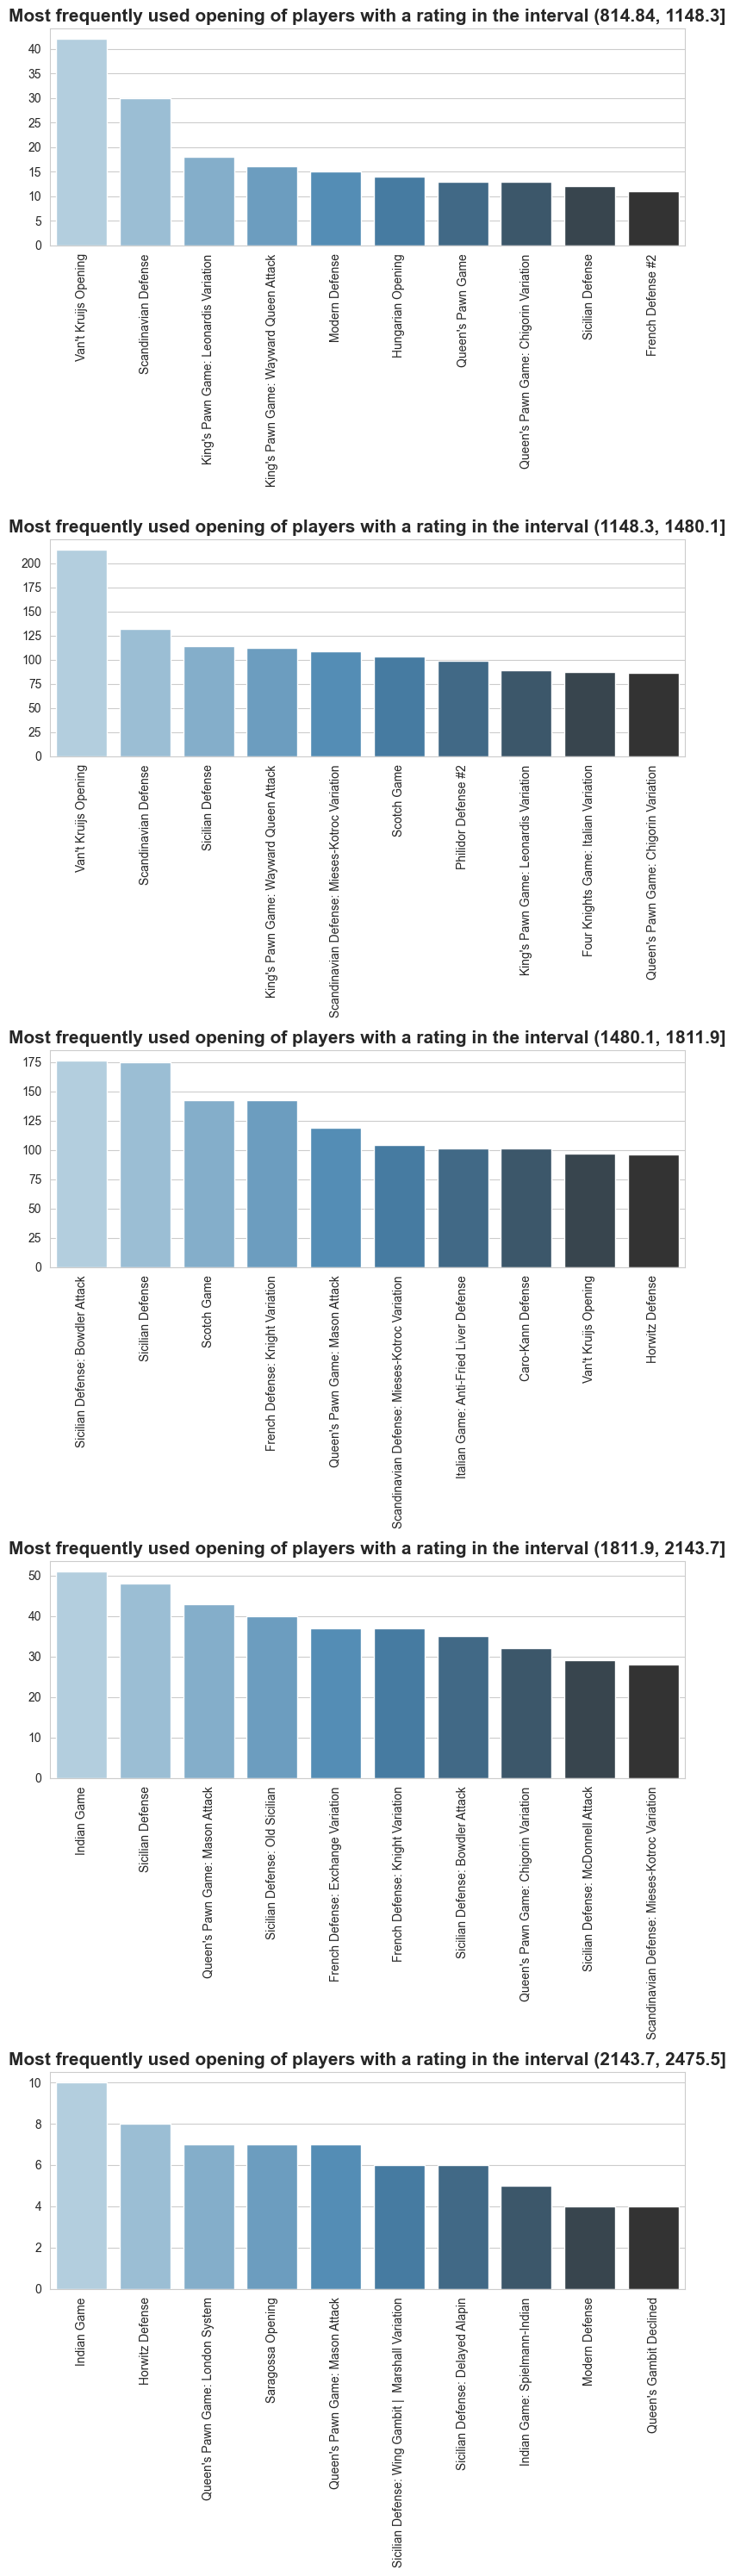

In [36]:
# Most frequently used openings for different ratings

cnt_bins = 5

# Calcuation the average rating of the two players
average_rating = (df['white_rating'] + df['black_rating']) / 2

# Building rating intervals and saving them in a variable
df['rating_interval'], limits = pd.cut(average_rating, cnt_bins, include_lowest=True, retbins=True)

# Sorting the entries of the datarame after the intervals to later have the plots in the right order
df = df.iloc[df['rating_interval'].cat.codes.argsort()]

# Gettin the intevals
unique_intervals = df['rating_interval'].unique()

fig, axs = plt.subplots(nrows=5, figsize=(8,30))

for bin in range(len(unique_intervals)):

    # Extraction entries corresponing to a certain ration interval
    df_filtered = df[df['rating_interval'] == unique_intervals[bin]]

    top_openings = df_filtered.opening_name.value_counts()[:10]

    sns.barplot(x=top_openings.index, y=top_openings.values, palette='Blues_d', ax=axs[bin], hue=np.arange(1,11)/10, legend=False)
    axs[bin].set_title(f'Most frequently used opening of players with a rating in the interval {unique_intervals[bin]}', font=font_dict_title)
    axs[bin].set_xticks(top_openings.index)
    axs[bin].set_xticklabels(top_openings.index, rotation=90)
    axs[bin].set_xlabel('')

    plt.tight_layout()
    

Amongst lower rated players the Van't Kruijs opening is the most popular, while higher players tend to not using this opening. Amongst the highest rated players in the Dataset this Indian Game is the most popular.

In [37]:
# Analyzing the difference in rating between the opponents

diff_rating = abs(df_final.white_rating - df_final.black_rating)
df_diff_rating = pd.DataFrame({'Winner': df_final.winner, 'Rating Difference': diff_rating, 'Rated': df_final.rated})
df_diff_rating['Higher rated'] = np.where(df_final.white_rating > df_final.black_rating, 'white', 'black')
df_diff_rating.head().style.set_properties(**{'background-color': '#2B3467', 'color': 'white', 'border': '1.5px solid black', 'font-family': 'Arial'}).set_caption('Head of Table').set_table_styles(styles)

,Winner,Rating Difference,Rated,Higher rated
0,white,309,False,white
1,black,61,True,white
2,white,4,True,black
3,white,15,True,black
4,white,54,True,white


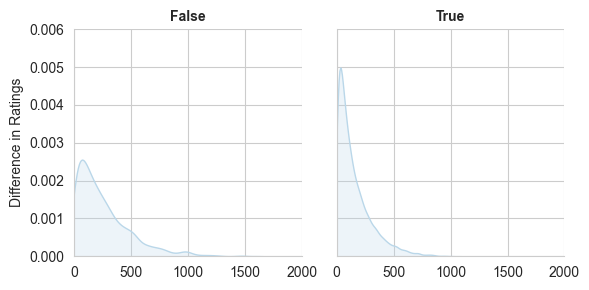

In [49]:
fig = sns.FacetGrid(df_diff_rating, col="Rated")
fig.map(sns.kdeplot, "Rating Difference", color='#BAD7E9', fill=True)
fig.set_axis_labels(x_var='', y_var='Difference in Ratings', font=font_dict_labels)
fig.set_titles(col_template = '{col_name}', font=font_dict_title)

plt.xlim(0, 2000)
plt.ylim(0, 0.006)
plt.tight_layout()
plt.show()

In [43]:
intervals = pd.qcut(df_diff_rating['Rating Difference'], 10)
df_diff_rating['Interval'] = intervals
df_diff_rating['Higher Rated Won'] = np.where(df_diff_rating['Higher rated'] == df_diff_rating['Winner'], 1, 0)
df_diff_rating.head().style.set_properties(**{'background-color': '#2B3467', 'color': 'white', 'border': '1.5px solid black', 'font-family': 'Arial'}).set_caption('Head of Table').set_table_styles(styles)

,Winner,Rating Difference,Rated,Higher rated,Interval,Higher Rated Won
0,white,309,False,white,"(283.0, 409.0]",1
1,black,61,True,white,"(57.0, 82.0]",0
2,white,4,True,black,"(-0.001, 15.0]",0
3,white,15,True,black,"(-0.001, 15.0]",0
4,white,54,True,white,"(34.0, 57.0]",1


(0.4, 0.9)

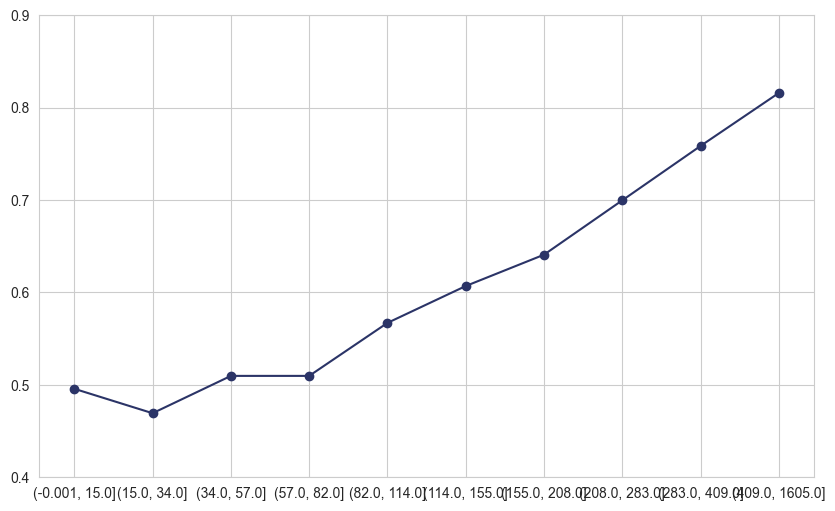

In [76]:
intervals_size = df_diff_rating['Interval'].value_counts()
df_intervals = df_diff_rating.groupby(['Interval'], as_index=False, observed=False).sum()
df_intervals.drop(['Rating Difference', 'Rated', 'Winner', 'Higher rated'], axis=1, inplace=True)
df_intervals['Intervals size'] = intervals_size
df_intervals['Win Rate Higher Rated'] = df_intervals['Higher Rated Won'] / df_intervals['Intervals size']
df_intervals.drop(['Intervals size'], axis=1, inplace=True)
df_intervals['Percentage'] = np.round(df_intervals['Win Rate Higher Rated'] * 100, 2)
df_intervals['Percentage'] = df_intervals['Percentage'].astype('string') + "%"
df_intervals['Interval'] = df_intervals.Interval.astype('string')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_intervals['Interval'], df_intervals['Win Rate Higher Rated'],'o-', color='#2B3467')

ax.set_ylim(0.4, 0.9)

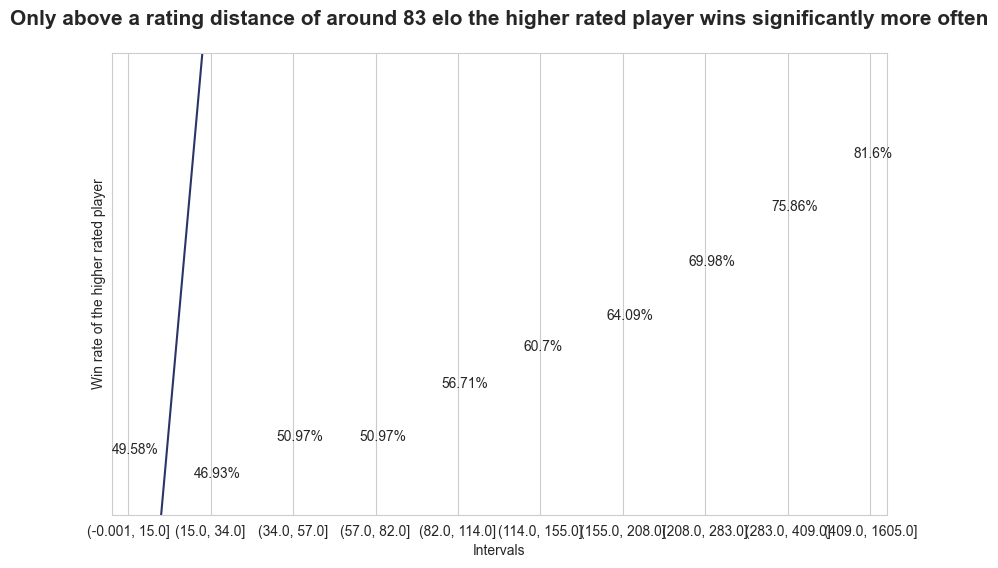

In [73]:
intervals_size = df_diff_rating['Interval'].value_counts()
df_intervals = df_diff_rating.groupby(['Interval'], as_index=False, observed=False).sum()
df_intervals.drop(['Rating Difference', 'Rated', 'Winner', 'Higher rated'], axis=1, inplace=True)
df_intervals['Intervals size'] = intervals_size
df_intervals['Win Rate Higher Rated'] = df_intervals['Higher Rated Won'] / df_intervals['Intervals size']
df_intervals.drop(['Intervals size'], axis=1, inplace=True)
df_intervals['Percentage'] = np.round(df_intervals['Win Rate Higher Rated'] * 100, 2)
df_intervals['Percentage'] = df_intervals['Percentage'].astype('string') + "%"
df_intervals['Interval'] = df_intervals.Interval.astype('string')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_intervals['Interval'], df_intervals['Percentage'],'o-', color='#2B3467')

for i in np.arange(10):
    xy = (np.arange(10)[i], df_intervals['Win Rate Higher Rated'][i])
    xytext = (np.arange(10)[i] - 0.2, df_intervals['Win Rate Higher Rated'][i] - 0.03)
    ax.annotate(df_intervals['Percentage'][i], xy=xy, xytext=xytext, font=font_dict_labels)

plt.ylim(0.4, 0.9)
plt.xlim(-0.2, 9.2)
plt.xlabel('Intervals', font=font_dict_labels)
plt.ylabel('Win rate of the higher rated player', font=font_dict_labels)
plt.xticks(np.arange(10), df_intervals['Interval'])
plt.title('Only above a rating distance of around 83 elo the higher rated player wins significantly more often', font=font_dict_title, pad=20)

plt.show()


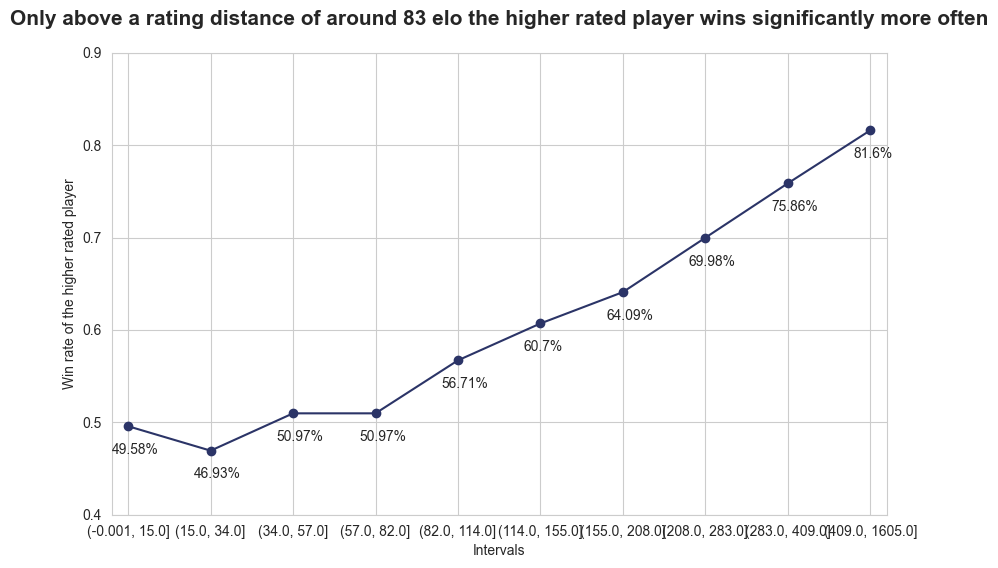

In [68]:
x_ticks = np.arange(0, 10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_ticks, df_intervals['Win Rate Higher Rated'],'o-', color='#2B3467')
#ax.set_facecolor('#FCFFE7')
#fig.patch.set_facecolor('#FCFFE7')

for i in x_ticks:
    xy = (x_ticks[i], df_intervals['Win Rate Higher Rated'][i])
    xytext = (x_ticks[i] - 0.2, df_intervals['Win Rate Higher Rated'][i] - 0.03)
    ax.annotate(df_intervals['Percentage'][i], xy=xy, xytext=xytext, font=font_dict_labels)

plt.ylim(0.4, 0.9)
plt.xlim(-0.2, 9.2)
plt.xlabel('Intervals', font=font_dict_labels)
plt.ylabel('Win rate of the higher rated player', font=font_dict_labels)
plt.xticks(x_ticks, df_intervals['Interval'])
plt.title('Only above a rating distance of around 83 elo the higher rated player wins significantly more often', font=font_dict_title, pad=20)

plt.show()